# Компьютерный практикум 2022-2023

### Используемые модули

- `numpy`
- `scipy.interpolate`
- `scipy.signal`
- `matplotlib`


## [Procrustes_analysis](https://en.wikipedia.org/wiki/Procrustes_analysis)

Метод статистического исследования форм (предметов).

Форма предмета задается набором точек, расположенных в характерных его местах.

Для сравнения двух форм выполняются следующие действия:

- перенос центроида в начало системы коородинат
    - `np.mean`

- масштабирование
    - [Root_mean_square](https://en.wikipedia.org/wiki/Root_mean_square)

- поворот на угол, при котором минимизируется расстояние между формами
    - [Orthogonal Procrustes Problem](https://en.wikipedia.org/wiki/Orthogonal_Procrustes_problem)
    - [`np.linalg.svd`](https://en.wikipedia.org/wiki/Singular_value_decomposition)

   
![](https://upload.wikimedia.org/wikipedia/commons/thumb/b/bb/Singular-Value-Decomposition.svg/1280px-Singular-Value-Decomposition.svg.png)

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.interpolate import interp1d

C:\Users\stasb\Anaconda3\envs\p38\lib\site-packages\numpy\_distributor_init.py:30: UserWarning: loaded more than 1 DLL from .libs:
C:\Users\stasb\Anaconda3\envs\p38\lib\site-packages\numpy\.libs\libopenblas.4SP5SUA7CBGXUEOC35YP2ASOICYYEQZZ.gfortran-win_amd64.dll
C:\Users\stasb\Anaconda3\envs\p38\lib\site-packages\numpy\.libs\libopenblas.NOIJJG62EMASZI6NYURL6JBKM4EVBGM7.gfortran-win_amd64.dll
C:\Users\stasb\Anaconda3\envs\p38\lib\site-packages\numpy\.libs\libopenblas.WCDJNK7YVMPZQ2ME2ZZHJJRJ3JIKNDB7.gfortran-win_amd64.dll
  warnings.warn("loaded more than 1 DLL from .libs:"


### Задача

Определить насколько близки фигуры в файле `shapes.npz`

### Загрузка форм (массивы `numpy`)

In [2]:
data = np.load('shapes.npz')
list(data)

['shape0', 'shape1']

In [3]:
arr0 = data['shape0']
arr1 = data['shape1']
arr0.shape, arr1.shape

((139, 2), (116, 2))

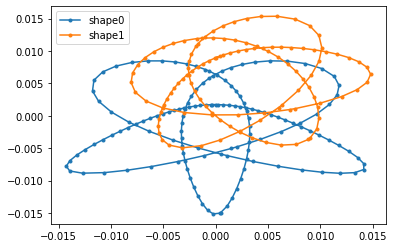

In [4]:
plt.plot(*arr0.T, '.-', label='shape0')
plt.plot(*arr1.T, '.-', label='shape1')
plt.legend();

### Приведение массивов к одному размеру 

In [5]:
np.cumsum([1, 2, 3, 4, 5])

array([ 1,  3,  6, 10, 15], dtype=int32)

In [6]:
np.cumsum(np.linalg.norm(arr0[1:] - arr0[:-1], axis=1))

array([0.00048223, 0.00095912, 0.00145162, 0.00199217, 0.00255283,
       0.00307143, 0.00357994, 0.00410625, 0.0046693 , 0.00528531,
       0.00596607, 0.0067116 , 0.00751046, 0.00835563, 0.00924971,
       0.01019871, 0.01120739, 0.01227666, 0.01340056, 0.01456148,
       0.01572233, 0.01681493, 0.01773642, 0.01853716, 0.01980538,
       0.02190415, 0.02412338, 0.0264749 , 0.02913209, 0.03182617,
       0.03460433, 0.03521092, 0.03770322, 0.04007322, 0.04226957,
       0.04437613, 0.04631006, 0.04796457, 0.04942963, 0.05089955,
       0.05260605, 0.05436646, 0.05611474, 0.05775749, 0.05922403,
       0.06050824, 0.06165056, 0.06270048, 0.06380552, 0.06427971,
       0.06533476, 0.06643263, 0.06758287, 0.06865908, 0.06966601,
       0.0706889 , 0.07179962, 0.07302572, 0.07421937, 0.07535866,
       0.07650895, 0.07771072, 0.07898931, 0.08035523, 0.08179125,
       0.08323215, 0.0845681 , 0.08567714, 0.08645598, 0.08707051,
       0.0872057 , 0.08836632, 0.089722  , 0.09124424, 0.09282

In [7]:
def arclen(x):
    res = np.zeros_like(x[:, 0])
    res[1:] = np.cumsum(np.linalg.norm(x[1:] - x[:-1], axis=1))
    return res

In [8]:
l0, l1 = arclen(arr0), arclen(arr1)

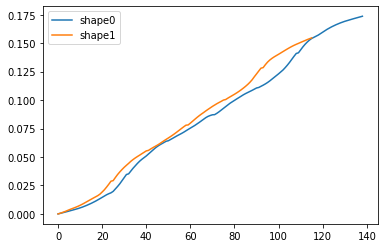

In [9]:
plt.plot(l0, label='shape0')
plt.plot(l1, label='shape1')
plt.legend();

In [10]:
spl0 = interp1d(l0, arr0, axis=0, kind='cubic')
spl1 = interp1d(l1, arr1, axis=0, kind='cubic')

In [11]:
N = 100
arr0 = spl0(np.linspace(l0[0], l0[-1], N))
arr1 = spl1(np.linspace(l1[0], l1[-1], N))

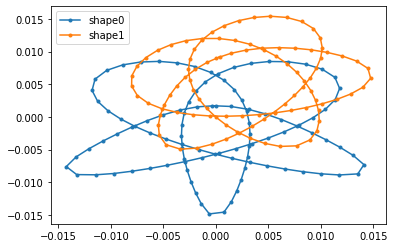

In [12]:
plt.plot(*arr0.T, '.-', label='shape0')
plt.plot(*arr1.T, '.-', label='shape1')
plt.legend();

### Перенос центроида в начало координат

In [13]:
m0, m1 = arr0.mean(axis=0), arr1.mean(axis=0)
m0, m1

(array([-2.18829288e-06, -1.94060115e-03]), array([0.00288675, 0.00499316]))

In [14]:
arr0 -= m0
arr1 -= m1

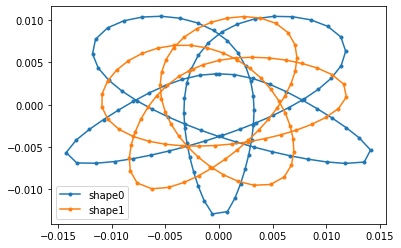

In [15]:
plt.plot(*arr0.T, '.-', label='shape0')
plt.plot(*arr1.T, '.-', label='shape1')
plt.legend();

### Масштабирование

In [16]:
def rms(x):
    return np.sqrt(np.mean(x**2, axis=0))

In [17]:
s0, s1 = rms(arr0), rms(arr1)
s0, s1

(array([0.00706189, 0.00606305]), array([0.00596045, 0.00562186]))

In [18]:
arr0 /= s0
arr1 /= s1

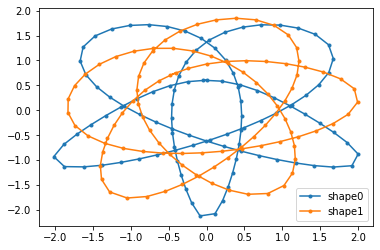

In [19]:
plt.plot(*arr0.T, '.-', label='shape0')
plt.plot(*arr1.T, '.-', label='shape1')
plt.legend();

### Поворот

In [20]:
M = arr0.T @ arr1
U, D, VT = np.linalg.svd(M)
R = U @ VT
mod_arr1 = arr1 @ R.T

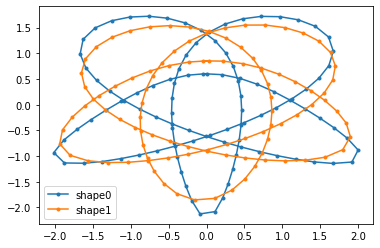

In [21]:
plt.plot(*arr0.T, '.-', label='shape0')
plt.plot(*mod_arr1.T, '.-', label='shape1')
plt.legend();

### Расстояние

In [22]:
np.linalg.norm(mod_arr1 - arr0, axis=1).mean()

0.27883534282536626

### Задание

В файле `shapes100.npz` находится 100 двумерных фигур.
Найти попарные минимальные расстояния между ними и вывести результат в виде цветовой карты.

In [23]:
# задать N (например, 100)
# написать функцию, равномерно распределяющую N точек по загруженной фигуре
# написать функцию, выполняющую прокрустово преобразование
# написать функцию, выполняющую расчет расстояния
# написать расчет попарных расстояний (N**2 / 2)

In [24]:
N = 100

In [25]:
def uniform_points(x, N):
    l = arclen(x)
    spl = interp1d(l, x, axis=0, kind='cubic')
    return spl(np.linspace(l[0], l[-1], N))

In [26]:
def procrustes(a, b):
    M = a.T @ b
    U, D, VT = np.linalg.svd(M)
    R = U @ VT
    mod_b = b @ R.T
    return mod_b

In [27]:
def dist(a, b):
    return np.linalg.norm(b - a, axis=1).mean()

In [28]:
A = np.empty((100, N, 2), dtype=float)
data = np.load('shapes100.npz')
for i, key in enumerate(data):
    arr = data[key]
    A[i, ...] = uniform_points(arr, N) 

In [29]:
from tqdm import trange

In [30]:
Dist = np.zeros((N, N), dtype=float)
for i in trange(N):
    for j in range(i+1, N):
        Dist[j, i] = dist(A[i], procrustes(A[i], A[j]))

100%|███████████████████████████████████████████████████████████████████████████████| 100/100 [00:00<00:00, 554.32it/s]


In [31]:
# для симметризации матрицы расстояний
# Dist += Dist.T

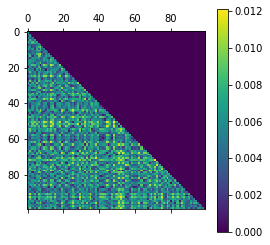

In [32]:
plt.matshow(Dist);
plt.colorbar();

### Быстрое преобразование Фурье

[Преобразование Фурье](https://ru.wikipedia.org/wiki/Преобразование_Фурье)

[Дискретное преобразование Фурье](https://ru.wikipedia.org/wiki/Дискретное_преобразование_Фурье)

[Быстрое преобразование Фурье](https://ru.wikipedia.org/wiki/Быстрое_преобразование_Фурье)

Коротко:

*Преобразование Фурье*: $\forall \omega \in \mathbb{R}: f(x) \rightarrow \hat{f}(\omega)$

*Дискретное преобразование Фурье*: 
$\forall \omega \in [\omega_0, 2\omega_0, 4\omega_0, ...]: f(x) \rightarrow \hat{f}(\omega)$

$\omega_0 = \frac{2\pi}{N}, N$ - количество измерений сигнала с равным шагом по времени

*Быстрое преобразование Фурье* - алгоритм вычисления дискретного преобразования Фурье, сложность которого меньше $O(N^2)$.


In [33]:
N = 1000
dt = 1.0 / N
t = np.linspace(0, N * dt, N, endpoint=False)
a = np.array([[1., 2., 3.]]).T
w = np.array([[5., 10., 20.]]).T
phi = np.array([[0., np.pi/4, np.pi/2]]).T

waves = a * np.sin(2*np.pi*w*t + phi)
waves.shape

(3, 1000)

In [34]:
f = waves.sum(axis=0)
f.shape

(1000,)

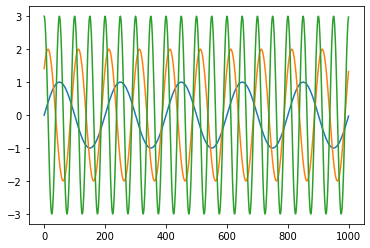

In [35]:
plt.plot(waves.T);

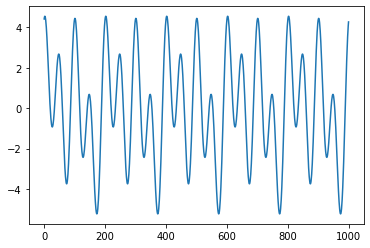

In [36]:
plt.plot(f);

In [37]:
r = np.fft.rfft(f)

In [38]:
amp = np.abs(r) / (N / 2)
freq = np.fft.rfftfreq(N, dt)

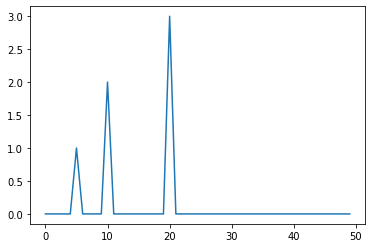

In [39]:
plt.plot(freq[:50], amp[:50]);

In [40]:
from scipy.signal import find_peaks

In [41]:
idx, h = find_peaks(amp, height=0.1)

In [42]:
h

{'peak_heights': array([1., 2., 3.])}

In [43]:
freq[idx]

array([ 5., 10., 20.])

### Задача

Восстановить периоды и амплитуды сигнала из файла `signal.npy` для $dt = 0.05$.

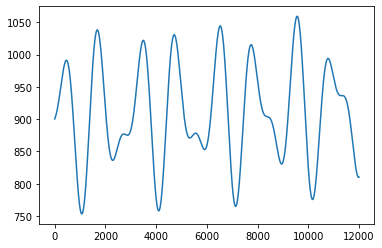

In [44]:
f = np.load('signal.npy')
N = f.size
dt = 0.05
plt.plot(f);

In [45]:
r = np.fft.rfft(f - f.mean())

In [46]:
r

array([-1.29716682e-10+0.00000000e+00j, -1.03957072e+04+4.11600765e+04j,
       -1.05121467e+03+2.79559958e+04j, ...,
        4.49960386e+01-2.35654082e-02j,  4.49960386e+01-1.17827033e-02j,
        4.49960386e+01+0.00000000e+00j])

In [47]:
amp = np.abs(r) / (N / 2)
freq = np.fft.rfftfreq(N, dt)

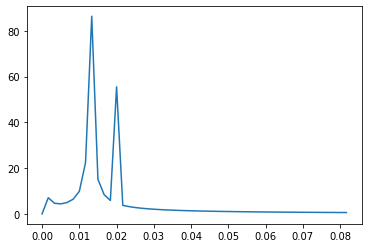

In [48]:
plt.plot(freq[:50], amp[:50]);

In [49]:
idx, h = find_peaks(amp, height=0.1)

In [50]:
h

{'peak_heights': array([ 7.07543211, 86.365161  , 55.52301749])}

In [51]:
1/freq[idx]

array([600.,  75.,  50.])